In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
# Time Series Momentum focuses only on the past return of a particular asset.
# If this return is positive, the asset will be bought, if negative, it will be shorted.

In [14]:
df = yf.download('AAPL',start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [19]:
def strategy(df,window=1): # the window counting is the numbet of days we want to go back
  df = df.copy()
  df['ret'] = np.log(df.Close.pct_change()+1) # calclualting log returns
  df['prior_n'] = df.ret.rolling(window).sum() # we can take sum only because they are log returns. If window=1, then it's the same as df['ret]
  df.dropna(inplace=True)
  df['position'] = [1 if  i > 0 else -1 for i in df.prior_n] # 1 for positive returns, -1 for negative ones
  df['strategy'] = df.position.shift(1) * df.ret
  return np.exp(df[['ret','strategy']].cumsum()).plot(figsize=(12,6))

<Axes: xlabel='Date'>

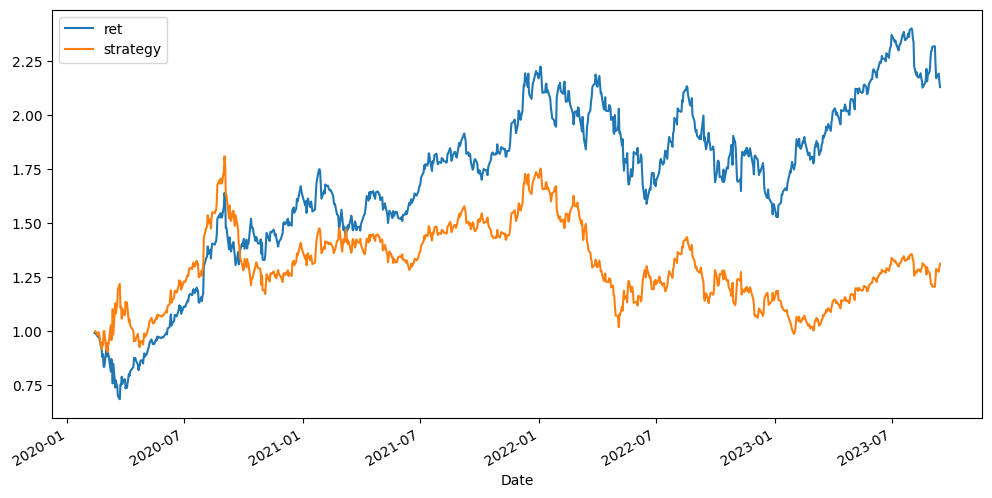

In [25]:
strategy(df=df,window=29)
# With Apple it's not a good idea

In [ ]:
# Intraday

In [ ]:
df1 = yf.download('BTC-USD', start='2023-09-10', interval='1m') # 1 minute time interval

In [ ]:
# if shorting is not a possibility then modify the function to:
'''def strategy(df,window=1):
  df = df.copy()
  df['ret'] = np.log(df.Close.pct_change()+1)
  df['prior_n'] = df.ret.rolling(window).sum()
  df.dropna(inplace=True)
  df['position'] = [1 if  i > 0 else 0 for i in df.prior_n]
  df['strategy'] = df.position.shift(1) * df.ret
  return np.exp(df[['ret','strategy']].cumsum()).plot(figsize=(12,6))'''

<Axes: xlabel='Datetime'>

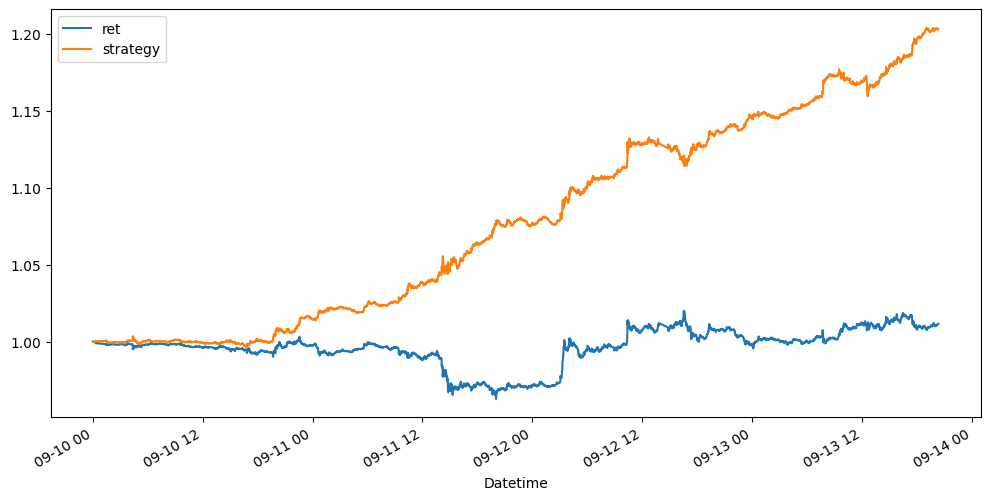

In [30]:
strategy(df1)